# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time

from keras.datasets import mnist

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

# Loading the Data

In [ ]:
mnist

<module 'keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/keras/datasets/mnist.py'>

In [ ]:
mnist_df = mnist.load_data()
(X_train1,y_train1), (X_test,y_test) = mnist.load_data()

print(X_train1.shape)
print(y_train1.shape)
print(X_test.shape)
print(y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Sample Images

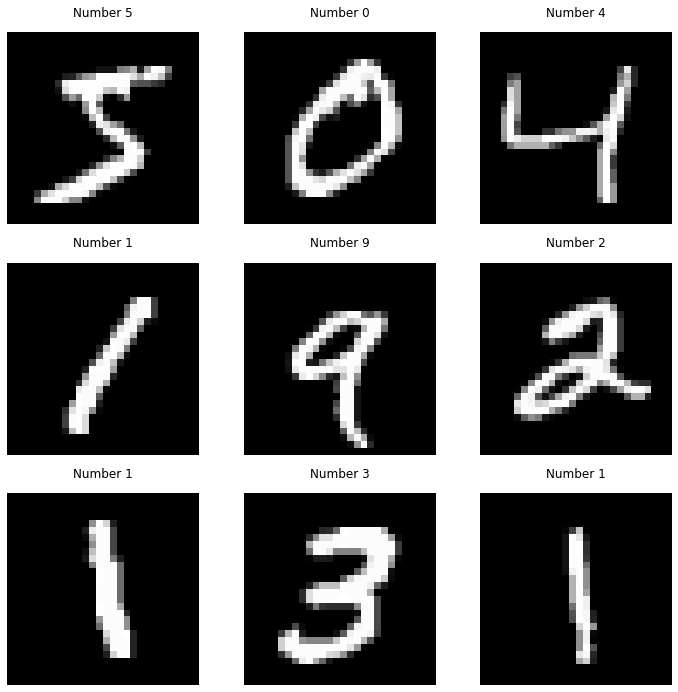

In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
  ax.matshow(X_train1[i])
  ax.axis("off")
  ax.set_title("Number {}".format(y_train1[i]))

fig.show()

# Data Preprocessing

In [ ]:
X_train1 = X_train1.reshape(len(X_train1),-1)
y_train1 = y_train1.reshape(len(y_train1),-1)
X_test = X_test.reshape(len(X_test),-1)
y_test = y_test.reshape(len(y_test),-1)

In [ ]:
X_train1 = pd.DataFrame(X_train1)
y_train1 = pd.DataFrame(y_train1)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

In [ ]:
y_train1.value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


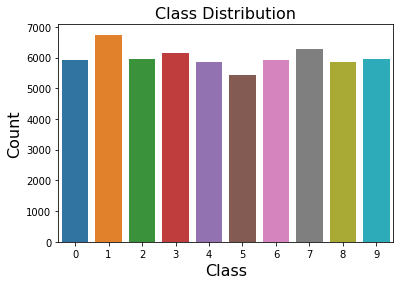

In [ ]:
sns.countplot(y_train1.iloc[:,0])
plt.title("Class Distribution", fontsize = 16)
plt.xlabel("Class", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.show()

# Train, Validation, Test split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, random_state = 20, test_size = .30)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


# Decision Tree

In [ ]:
start_time = time.time()
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
print("Computation time for Decision Tree is " + str(time.time() - start_time)+' seconds')

Computation time for Decision Tree is 14.31376051902771 seconds


In [ ]:
dtree_pred = dtree.predict(X_val)
dtree_pred

array([9, 8, 7, ..., 5, 8, 7], dtype=uint8)

In [ ]:
print(dtree.score(X_val,y_val))
print(dtree.score(X_train,y_train))

0.862
1.0


In [ ]:
dtree_accuracy = accuracy_score(y_val, dtree_pred)
dtree_error = 1 - dtree_accuracy

print('Decision Tree Accuracy (Before Parameter Tuning):                ' + str(dtree_accuracy))
print("Decision Tree Misclassification Rate (Before Parameter Tuning): ", str(dtree_error))

Decision Tree Accuracy (Before Parameter Tuning):                0.862
Decision Tree Misclassification Rate (Before Parameter Tuning):  0.138


### Tree Pruning

In [ ]:
dtree_params = {"criterion": ["gini","entropy"],
                "splitter":["best","random"],
                "max_depth":[2,4,6,8,10,12,14,16,18,20]}
dtree_gcv = GridSearchCV(estimator = dtree, param_grid = dtree_params, cv = 5)
dtree_gcv.fit(X_train,y_train)          

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'splitter': ['best', 'random']})

In [ ]:
print(dtree_gcv.best_params_)

{'criterion': 'entropy', 'max_depth': 16, 'splitter': 'best'}


In [ ]:
dtree_pruned = DecisionTreeClassifier(criterion="entropy",max_depth=18,splitter="best")
dtree_pruned.fit(X_train,y_train)
dtree_pred2 = dtree_pruned.predict(X_test) 

In [ ]:
print(dtree_pruned.score(X_train,y_train))
print(dtree_pruned.score(X_val,y_val))

0.9994761904761905
0.8677222222222222


In [ ]:
dtree_pruned_acc = accuracy_score(y_test, dtree_pred2)
dtree_pruned_error = 1 - dtree_pruned_acc

print('Decision Tree Accuracy:                ' + str(dtree_pruned_acc))
print("Decision Tree Misclassification Rate: ", str(dtree_pruned_error))

Decision Tree Accuracy:                0.8783
Decision Tree Misclassification Rate:  0.12170000000000003


# Random Forest

In [ ]:
start_time_rf = time.time()
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [ ]:
print("Computation time for Random Forest is " + str(time.time() - start_time_rf) +' seconds')

Computation time for Random Forest is 28.75333285331726 seconds


In [ ]:
print(rf.score(X_train,y_train))

1.0


In [ ]:
rf_pred = rf.predict(X_val)

In [ ]:
rf_accuracy = rf.score(X_val,y_val)
rf_error = 1 - rf_accuracy

print('Random Forest Accuracy (Before Parameter Tuning):                ' + str(rf_accuracy))
print("Random Forest Misclassification Rate (Before Parameter Tuning): ", str(rf_error))

Random Forest Accuracy (Before Parameter Tuning):                0.9661666666666666
Random Forest Misclassification Rate (Before Parameter Tuning):  0.03383333333333338


### Parameter Tuning

In [ ]:
rf_params = {
    'max_depth': [0,10,20,30],
    'max_features': ["auto", "sqrt", "log2"],
    'n_estimators': [100, 200, 300, 1000]}
rf_gcv = GridSearchCV(estimator = rf, param_grid = rf_params, cv = 5)
rf_gcv.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [0, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 1000]})

In [ ]:
print(rf_gcv.best_params_)

{'max_depth': 30, 'max_features': 'auto', 'n_estimators': 1000}


In [ ]:
rf_pruned = RandomForestClassifier(max_depth = 30, max_features = "auto", n_estimators = 1000)
rf_pruned.fit(X_train,y_train)
rf_pred2 = rf_pruned.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
print(rf_pruned.score(X_train,y_train))

0.9999761904761905


In [ ]:
rf_pruned_acc = rf_pruned.score(X_test,y_test)
rf_pruned_error = 1 - rf_pruned_acc

print('Random Forest Accuracy:                ' + str(rf_pruned_acc))
print("Random Forest Misclassification Rate: ", str(rf_pruned_error))

Random Forest Accuracy:                0.9696
Random Forest Misclassification Rate:  0.030399999999999983


# Bagged Tree

### Base Estimator: Decision Tree

In [ ]:
bg_time = time.time()
bg = BaggingClassifier(DecisionTreeClassifier())
bg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [ ]:
print("Computation time for Bagged Tree is " + str(time.time() - bg_time) +' seconds')

Computation time for Bagged Tree is 79.2871413230896 seconds


In [ ]:
bg.score(X_train,y_train)

0.9985714285714286

In [ ]:
bg_pred = bg.predict(X_test)
bg_acc = bg.score(X_test,y_test)
bg_error = 1 - bg_acc

print('Bagged Tree Accuracy:                ' + str(bg_acc))
print("Bagged Tree Misclassification Rate: ", str(bg_error))

Bagged Tree Accuracy:                0.9387
Bagged Tree Misclassification Rate:  0.06130000000000002


### Base Estimator: Random Forest

In [ ]:
bg_time2 = time.time()
bg_rf = BaggingClassifier(RandomForestClassifier())
bg_rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=RandomForestClassifier())

In [ ]:
print("Computation time for Bagged Tree is " + str(time.time() - bg_time2) +' seconds')

Computation time for Bagged Tree is 189.9876308441162 seconds


In [ ]:
print(bg_rf.score(X_train,y_train))

0.998547619047619


In [ ]:
bg_pred2 = bg_rf.predict(X_test)
bg_acc2 = bg_rf.score(X_test,y_test)
bg_error2 = 1 - bg_acc2

print('Bagged Tree Accuracy:                ' + str(bg_acc2))
print("Bagged Tree Misclassification Rate: ", str(bg_error2))

Bagged Tree Accuracy:                0.966
Bagged Tree Misclassification Rate:  0.03400000000000003


# Boosting

### Base Estimator: Decision Tree

In [ ]:
adb_time = time.time()
adb = AdaBoostClassifier()
adb.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [ ]:
print("Computation time for Boosted Ensemble is " + str(time.time() - adb_time)+' seconds')

Computation time for Boosted Ensemble is 83.42315673828125 seconds


In [ ]:
print(adb.score(X_train,y_train))

0.7070952380952381


In [ ]:
adb_pred = adb.predict(X_test)
adb_acc = adb.score(X_test,y_test)
adb_error = 1 - adb_acc

print('Boosted Tree Accuracy:                ' + str(adb_acc))
print("Boosted Tree Misclassification Rate: ", str(adb_error))

Boosted Tree Accuracy:                0.7074
Boosted Tree Misclassification Rate:  0.29259999999999997


### Base Estimator: Random Forest

In [ ]:
adb_time2 = time.time()
adb_rf = AdaBoostClassifier(RandomForestClassifier())
adb_rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [ ]:
print("Computation time for Boosted Ensemble is " + str(time.time() - adb_time2)+' seconds')

Computation time for Boosted Ensemble is 36.54026675224304 seconds


In [ ]:
print(adb_rf.score(X_train,y_train))

1.0


In [ ]:
adb_pred2 = adb_rf.predict(X_test)
adb_acc2 = adb_rf.score(X_test,y_test)
adb_error2 = 1 - adb_acc2

print('Boosted Tree Accuracy:                ' + str(adb_acc2))
print("Boosted Tree Misclassification Rate: ", str(adb_error2))

Boosted Tree Accuracy:                0.9671
Boosted Tree Misclassification Rate:  0.03290000000000004


# Stacking Ensemble

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

In [ ]:
dtc =  DecisionTreeClassifier(criterion="entropy",max_depth=18,splitter="best")
rfc = RandomForestClassifier(max_depth = 30, max_features = "auto", n_estimators = 1000)
knn =  KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='rbf',gamma=3e-7,C=2)
lr = LogisticRegression(max_iter=100, multi_class='multinomial')
clf = [('dtc',dtc),('rfc',rfc),('knn',knn),('svm',svm),('lr',lr)]

In [ ]:
stack_model_time = time.time()
stack_model = StackingClassifier(estimators = clf)
stack_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

StackingClassifier(estimators=[('dtc',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=18)),
                               ('rfc',
                                RandomForestClassifier(max_depth=30,
                                                       n_estimators=1000)),
                               ('knn', KNeighborsClassifier()),
                               ('svm', SVC(C=2, gamma=3e-07)),
                               ('lr',
                                LogisticRegression(multi_class='multinomial'))])

In [ ]:
print("Computation time for Stacking Ensemble is " + str(time.time() - stack_model_time)+' seconds')

Computation time for Stacking Ensemble is 2431.0181012153625 seconds


In [ ]:
stack_pred = stack_model.predict(X_test)


In [ ]:
stack_accuracy = stack_model.score(X_test,y_test)
stack_error = 1 - stack_accuracy

print('Stacking Ensemble Accuracy:                ' + str(stack_accuracy))
print("Stacking Ensemble Misclassification Rate: ", str(stack_error))

Stacking Ensemble Accuracy:                0.981
Stacking Ensemble Misclassification Rate:  0.019000000000000017


# Model Comparison

In [ ]:
df = pd.DataFrame({'Model Accuracy': [dtree_pruned_acc,rf_pruned_acc,bg_acc,bg_acc2,adb_acc,adb_acc2,stack_accuracy],
                   'Misclassification Rate': [dtree_pruned_error,rf_pruned_error,bg_error,bg_error2,adb_error,adb_error2,stack_error]  
}, index = ['Decision Tree','Random Forest','Bagged (Decision Tree)','Bagged (Random Forest)','Boost (Decision Tree)','Boost (Random Forest',
            'Stacking Ensemble'])
df

,Model Accuracy,Misclassification Rate
Decision Tree,0.8783,0.1217
Random Forest,0.9696,0.0304
Bagged (Decision Tree),0.9387,0.0613
Bagged (Random Forest),0.9660,0.0340
Boost (Decision Tree),0.7074,0.2926
Boost (Random Forest,0.9671,0.0329
Stacking Ensemble,0.9810,0.0190
